<center><h1>WhatsApp Group Chat Analysis<h1>

### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

### Reading whats chat group data

In [2]:
df = pd.read_csv('WhatsApp-Chat-with-Machine-Learning.csv')

In [3]:
df.head()

,"08/04/19, 10:51 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info."
0,"08/04/19, 10:51 pm - Panchal created group ""Da..."
1,"08/04/19, 10:51 pm - Panchal added you"
2,"08/04/19, 10:51 pm - Panchal: With huge respec..."
3,"08/04/19, 10:52 pm - Ankan DUTTA: 😅"
4,"08/04/19, 10:52 pm - Panchal: 😂 Your presence ..."


### Created a new column from the existing column data

##### I forgot to use 'rename' column name

In [5]:
df['Full'] = df[df.columns]

In [6]:
df.columns

Index(['08/04/19, 10:51 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.', 'Full'], dtype='object')

### Removed already existed column

In [7]:
df = df.drop(df.columns[0], axis=1)

In [80]:
df.head()

,Full
0,"08/04/19, 10:51 pm - Panchal created group ""Da..."
1,"08/04/19, 10:51 pm - Panchal added you 08/04/1..."
2,"08/04/19, 10:51 pm - Panchal: With huge respec..."
3,"08/04/19, 10:52 pm - Ankan DUTTA: 😅"
4,"08/04/19, 10:52 pm - Panchal: 😂 Your presence ..."


### Converted object type to string type

In [9]:
df.Full = df.Full.astype('str')

df.Full[:10]

0    08/04/19, 10:51 pm - Panchal created group "Da...
1               08/04/19, 10:51 pm - Panchal added you
2    08/04/19, 10:51 pm - Panchal: With huge respec...
3                  08/04/19, 10:52 pm - Ankan DUTTA: 😅
4    08/04/19, 10:52 pm - Panchal: 😂 Your presence ...
5    08/04/19, 10:53 pm - Ankan DUTTA: Thanks for a...
6    08/04/19, 10:53 pm - Ankan DUTTA: I'll try my ...
7    08/04/19, 10:53 pm - Chinki: Bhai bhai bhai🙏🏽🙏...
8        08/04/19, 10:53 pm - Ankan DUTTA: Bhai Bhai 🥺
9    08/04/19, 10:53 pm - Panchal: Thanks to Pranay...
Name: Full, dtype: object

In [10]:
# Creating data column
# df['date'] = df.Full.apply(lambda x: x.split(',')[0])

# Sample column
# df['col'] = df.Full.apply(lambda x: x.split(',')[1:])

##### There are few rows starting with text messages and not dates. This is because, few messages are too big that messages are continued in a new row. Messages from that row should be added to the previous/respective message sender. After adding message, we need to remove the below message as it is not necessary.

##### Note: xxxxx xxxxx refers to a 10 digit phone number. Due to privacy issue, I have to use x instead of phone numbers

##### Example: Raw data

row1: 03/09/2019, 19:20 - +91 xxxxx xxxxx: Hi, I am doing good...

row2: How are you doing?

row3: 03/09/2019, 19:22 - +91 xxxxx xxxxx: I am also doing good.

##### After cleaning:

row1: 03/09/2019, 19:20 - +91 xxxxx xxxxx: Hi, I am doing good... How are you doing?

row3: 03/09/2019, 19:22 - +91 xxxxx xxxxx: I am also doing good.

In [11]:
m = 0
ind = []

for i in range(df.shape[0]):
    
    sp = re.split(', | -', df.Full[i])
    
    if len(sp) != 3:
        if i - m == 1:
            df.Full[n] = df.Full[n] +' '+ df.Full[i]
            ind.append(i)
            m = i
        else:
            df.Full[i-1] = df.Full[i-1] +' '+ df.Full[i]
            m = i
            n = i-1
            ind.append(i)

### Dropping those rows whose messages are continued in new line.

In [12]:
df_dr = df.drop(ind, axis = 0)

In [13]:
# df.Full = df.Full.apply(lambda x: x.strip())

### As we have dropped few rows, we will lose index value. To avoid key error, creating new index which has sequence of numbers.


##### Note: We can even use single line code 'df.reset_index(inplace = True)'  instead of hard coding as I did below.

In [2]:
# Note: We can even use single line code 'df.reset_index(inplace = True)'  instead of hard coding as I did below.

# df_dr.reset_index(inplace = True)

In [14]:
# Index
idx = []
for i in range(df_dr.shape[0]):
    idx.append(i)

# Creating index column
df_dr['ind1'] = idx
 
# Updating index
df_dr.set_index(['ind1'], inplace = True)

In [83]:
"""
for i in range(df_dr.Full.shape[0]):
    sp = re.split(', | -', df_dr.Full[i])
    if len(sp) < 3:
        print(i)
"""

"\nfor i in range(df_dr.Full.shape[0]):\n    sp = re.split(', | -', df_dr.Full[i])\n    if len(sp) < 3:\n        print(i)\n"

In [16]:
# df_dr.to_csv('pre_pro_chat.csv', index = False)

### Creating extra rows that are filled with month, day, date, time, hour, etc, extracted from the timestamps.

In [17]:
df_dr['date'] = 0
df_dr['time'] = 0
df_dr['hour'] = 0
df_dr['mes_sam'] = 0
df_dr['contact'] = 0
df_dr['message'] = 0

### Splitting data and storing them to respective columns like date, time, hour, message

In [18]:
import warnings
warnings.filterwarnings('ignore')

for i in range(df_dr.shape[0]):
    spl = re.split(', | -', df_dr.Full[i])
    if len(spl) >= 3:
        df_dr['date'][i] = spl[0].strip(' ')
        df_dr['time'][i] = spl[1].strip(' ')
        df_dr['hour'][i] = spl[1][:2].strip(' ')
        df_dr['mes_sam'][i] = spl[2].strip(' ')
        
        spl2 = df_dr['mes_sam'][i].split(':')
        if len(spl2) >= 2:
            df_dr['contact'][i] = spl2[0].strip(' ')
            df_dr['message'][i] = df_dr['mes_sam'][i][len(spl2[0]) + 1 :].strip(' ')
        else:
            df_dr['contact'][i] = spl2[0][:-37].strip(' ')
            df_dr['message'][i] = spl2[0][-37:].strip(' ')
    else:
        print(i)

### Dropping unnecessary columns

In [20]:
df_dr.columns

Index(['Full', 'date', 'time', 'hour', 'mes_sam', 'contact', 'message'], dtype='object')

In [21]:
df_final = df_dr.drop(['Full', 'mes_sam'], axis = 1)

In [22]:
df_final.columns

Index(['date', 'time', 'hour', 'contact', 'message'], dtype='object')

In [24]:
df_final.head()

,date,time,hour,contact,message
ind1,,,,,
0,08/04/19,10:51 pm,10,,"Panchal created group ""Data Science"""
1,08/04/19,10:51 pm,10,,Panchal added you 08/04/19
2,08/04/19,10:52 pm,10,Ankan DUTTA,😅
3,08/04/19,10:52 pm,10,Panchal,😂 Your presence is most important here.
4,08/04/19,10:53 pm,10,Ankan DUTTA,Thanks for adding me


### Special case

I couldn't clean 1st 2 rows. So manually, have to clean them.

In [25]:
print(df.Full[0])
print(df.Full[1])

08/04/19, 10:51 pm - Panchal created group "Data Science"
08/04/19, 10:51 pm - Panchal added you 08/04/19, 10:51 pm - Panchal: With huge respect to Pranay's wonderful thought, creating this group where theme with only be to share ml related knowledge. As we are seeing many unwanted discussions are going on in appliedai group and is happening more day by day, Pranay came up with a plan to create a group of serious learners.


In [26]:
df_final.message[0] = 'created group "Data Science"'
df_final.message[1] = "With huge respect to Pranay's wonderful thought, creating this group where theme with only be to share ml related knowledge. As we are seeing many unwanted discussions are going on in appliedai group and is happening more day by day, Pranay came up with a plan to create a group of serious learners."

df_final.contact[0] = 'Panchal'
df_final.contact[1] = 'Panchal'

In [27]:
df_final.head()

,date,time,hour,contact,message
ind1,,,,,
0,08/04/19,10:51 pm,10,Panchal,"created group ""Data Science"""
1,08/04/19,10:51 pm,10,Panchal,With huge respect to Pranay's wonderful though...
2,08/04/19,10:52 pm,10,Ankan DUTTA,😅
3,08/04/19,10:52 pm,10,Panchal,😂 Your presence is most important here.
4,08/04/19,10:53 pm,10,Ankan DUTTA,Thanks for adding me


### Only to make sure no rows have text under date column, am checking if there are any text under date column. So finding those rows and removing them.

In [28]:
alp = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
       'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

al = []
for i in range(df_final.shape[0]):
    for j in range(len(alp)):
        if alp[j] in df_final.date[i][0] or alp[j] in df_final.date[i][-1:] :
            al.append(i)

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 5 columns):
date       2008 non-null object
time       2008 non-null object
hour       2008 non-null object
contact    2008 non-null object
message    2008 non-null object
dtypes: object(5)
memory usage: 174.1+ KB


In [30]:
df_fin = df_final.drop(al, axis = 0)

### As we have dropped few rows, we will lose index value. To avoid key error, creating new index which has sequence of numbers.

##### Note: We can even use single line code 'df.reset_index(inplace = True)'  instead of hard coding as I did below.

In [3]:
# Note: We can even use single line code 'df.reset_index(inplace = True)'  instead of hard coding as I did below.

# df_dr.reset_index(inplace = True)

In [31]:
# Index
idx = []
for i in range(df_fin.shape[0]):
    idx.append(i)

# Creating index column
df_fin['ind1'] = idx
 
# Updating index
df_fin.set_index(['ind1'], inplace = True)

In [32]:
# df_final.to_csv('final_chat.csv')

In [33]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2002
Data columns (total 5 columns):
date       2003 non-null object
time       2003 non-null object
hour       2003 non-null object
contact    2003 non-null object
message    2003 non-null object
dtypes: object(5)
memory usage: 93.9+ KB


### Converting string date into date format (d/m/y)

In [34]:
from datetime import datetime, date

df_fin.date = df_fin.date.apply(lambda x: datetime.strptime(x, '%d/%m/%y'))

### Getting day, month and year

##### Day: df.col.strftime('%A')

##### Month: df_col.strftime('%B')

In [35]:
df_fin['day'] = df_fin.date.apply(lambda x: x.strftime('%A'))
df_fin['month'] = df_fin.date.apply(lambda x: x.strftime('%B'))
df_fin['year'] = df_fin.date.apply(lambda x: x.strftime('%Y'))

### Converting 12 hour format to 24 hour format

In [36]:
for i in range(df_fin.shape[0]):
    if df_fin.time[i][-2:] == 'am':
        if df_fin.time[i][:2] == '12':
            df_fin.time[i] = '00' + df_fin.time[i][2:-2]
            df_fin.time[i] = df_fin.time[i].strip(' ')
        else:
            df_fin.time[i] = df_fin.time[i][:-2].strip(' ')
    else:
        if df_fin.time[i][:2] == '12':
            df_fin.time[i] = df_fin.time[i][:-2].strip(' ')
        else:
            df_fin.time[i] = str(int(df_fin.time[i][:-6]) + 12) + df_fin.time[i][-6:-2]
            df_fin.time[i] = df_fin.time[i].strip(' ')

### Converting string time in time

In [37]:
from datetime import datetime, date

df_fin.time = df_fin.time.apply(lambda x: datetime.strptime(x, '%H:%M'))

In [38]:
df_fin['hour'] = df_fin.time.apply(lambda x: x.hour)
df_fin['minute'] = df_fin.time.apply(lambda x: x.minute)

# Final Dataframe

In [39]:
df_final_frame = df_fin.drop(['date', 'time'], axis = 1)

In [40]:
df_final_frame.head()

,hour,contact,message,day,month,year,minute
ind1,,,,,,,
0,22,Panchal,"created group ""Data Science""",Monday,April,2019,51
1,22,Panchal,With huge respect to Pranay's wonderful though...,Monday,April,2019,51
2,22,Ankan DUTTA,😅,Monday,April,2019,52
3,22,Panchal,😂 Your presence is most important here.,Monday,April,2019,52
4,22,Ankan DUTTA,Thanks for adding me,Monday,April,2019,53


In [42]:
# df_final_frame.to_csv('Machine_Learning_Chat_final_frame.csv')

# Exploratory Data Analysis

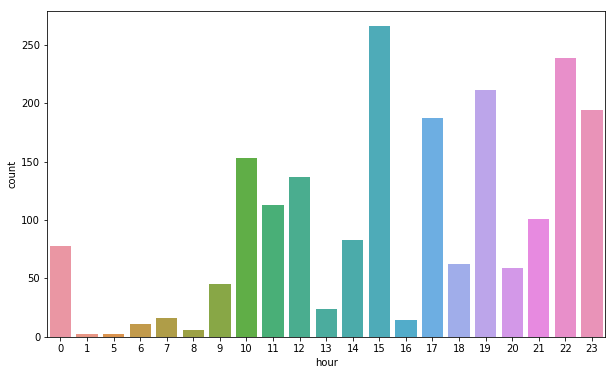

In [96]:
plt.figure(figsize = (10,6))
sns.countplot(df_final_frame.hour)

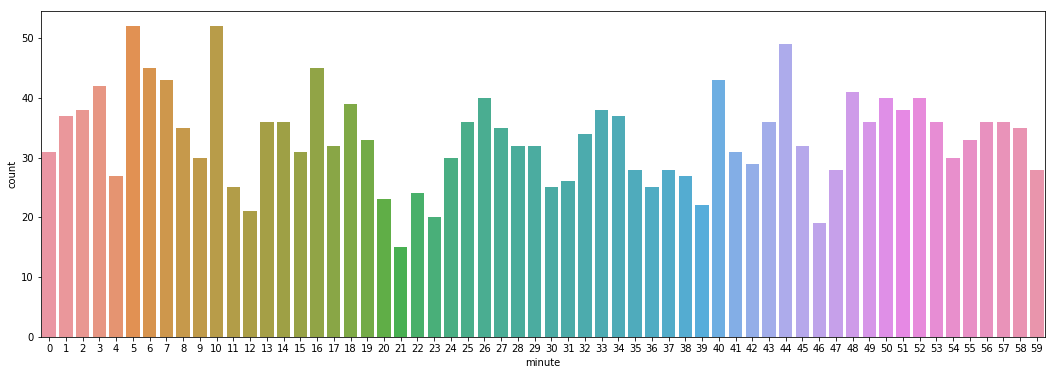

In [44]:
plt.figure(figsize = (18,6))
sns.countplot(df_final_frame.minute)

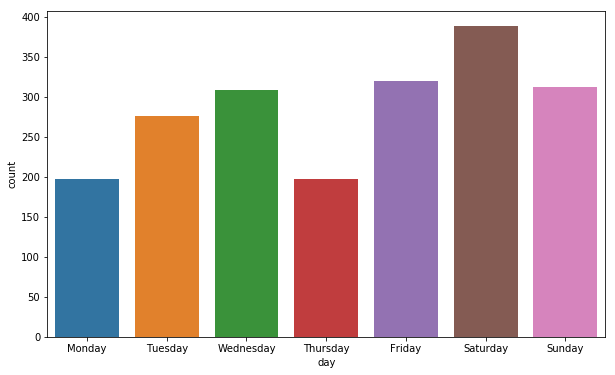

In [98]:
plt.figure(figsize = (10,6))
sns.countplot(df_final_frame.day)

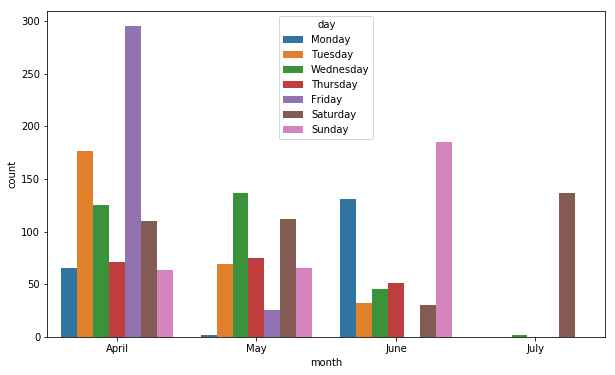

In [93]:
plt.figure(figsize = (10,6))
sns.countplot(df_final_frame.month, hue = df_final_frame.day)

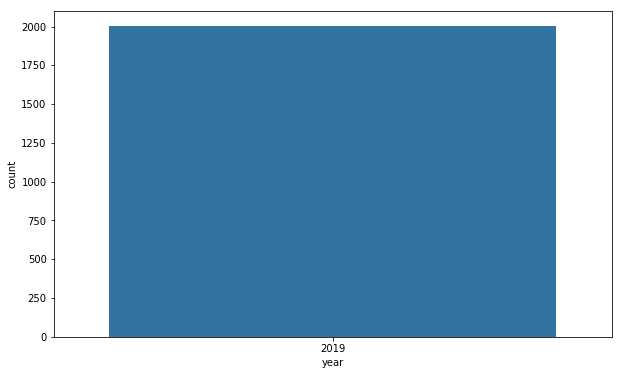

In [91]:
plt.figure(figsize = (10,6))
sns.countplot(df_final_frame.year)

[Text(0,0,'Panchal'),
 Text(0,0,'Ankan DUTTA'),
 Text(0,0,'Chinki'),
 Text(0,0,''),
 Text(0,0,'Harry'),
 Text(0,0,'Ganguly'),
 Text(0,0,'Harry changed their phone number to a new number. Tap to me'),
 Text(0,0,'Mera Jio'),
 Text(0,0,'Mera Jio changed their phone number to a new number.'),
 Text(0,0,'Sk')]

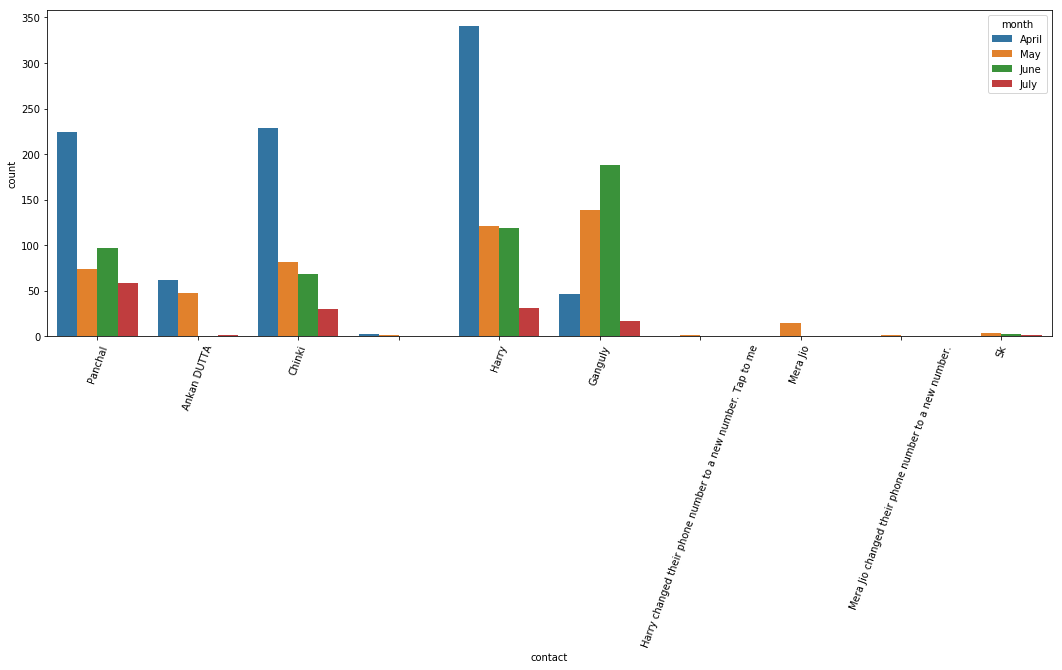

In [89]:
plt.figure(figsize = (18,6))
p = sns.countplot(df_final_frame.contact, hue = df_final_frame.month)
p.set_xticklabels(p.get_xticklabels(), rotation = 70)

In [49]:
df_final_frame.contact.value_counts().head(10)

Harry                                                          612
Panchal                                                        454
Chinki                                                         409
Ganguly                                                        390
Ankan DUTTA                                                    110
Mera Jio                                                        15
Sk                                                               7
                                                                 4
Mera Jio changed their phone number to a new number.             1
Harry changed their phone number to a new number. Tap to me      1
Name: contact, dtype: int64

In [50]:
df_final_frame.message.value_counts().head(10)

<Media omitted>    93
🤣                  21
☺                  13
😁                   9
Yes                 9
😅                   8
Accha               7
Haan                7
🤔                   6
Oh                  6
Name: message, dtype: int64

### Message length

In [51]:
mes = []

for i in range(df_final_frame.shape[0]):
    mes_len = df_final_frame.message[i].split()
    mes.append(len(mes_len))

In [52]:
df_final_frame_sam = df_final_frame

In [53]:
df_final_frame_sam['msg_len'] = mes

In [54]:
max_mes = df_final_frame_sam.msg_len.max()

In [55]:
df_final_frame_sam[df_final_frame_sam.msg_len == max_mes]

,hour,contact,message,day,month,year,minute,msg_len
ind1,,,,,,,,
1435,7,Harry,See.. Bhai aisa video dekhne mi time lagta ha...,Tuesday,June,2019,39,95


In [56]:
df_final_frame_sam.message[1435]

'See..  Bhai aisa video dekhne mi time lagta hai.. Aisa kiya kro.. Har concept padhke  ik  video recorder se record kra kro video by summerizing the concept.. .. nan nan If just suppose video 35 min.. Ki hui..😁 nan See my approach.. For every concept i maked swlf revesion videos. Not more than 5 minutes video... nan Video lenght depend on the concept.. nan See aagr aisa kroogee... Dwkho concept padhke apne dimag mi clearity aati hai concept ki..  Sath mi us clearity ko record krlo for future... Notes bnane bethoge.. To ghntee lag jainnge'

In [189]:
"""from wordcloud import WordCloud
wordcloud = WordCloud().generate(tokens[5])

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

'from wordcloud import WordCloud\nwordcloud = WordCloud().generate(tokens[5])\n\n# Display the generated image:\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\n'

In [142]:
!pip install wordcloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
phik 0.9.8 has requirement numpy>=1.15.4, but you'll have numpy 1.15.1 which is incompatible.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [57]:
from wordcloud import WordCloud

In [78]:
w = ['Artificial-Intelligence', 'Machine-Learning', 'Data-Science', 'Natural-Language-Processing', 'Deep-Learning']
# w = ['Artificial Intelligence     ']

(-0.5, 399.5, 199.5, -0.5)

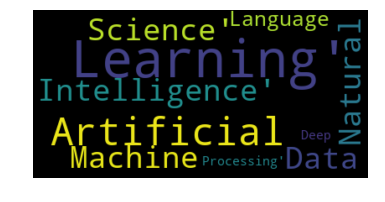

In [79]:
wc = WordCloud().generate(str(w))
plt.imshow(wc, interpolation = 'bilinear')

plt.axis('off')

<center><h1>End<h1>